In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [154]:
data = []
labels = []
classes =5
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'Train', str(i))
    images = os.listdir(path)
    for a in images:
        image = Image.open(path + "\\"+ a)
        image = image.resize((30,30))
        image = np.array(image)
        data.append(image)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)

In [155]:
cur_path

'C:\\Users\\User\\Desktop\\EQUINOX'

In [156]:
print(data.shape, labels.shape)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(1948, 30, 30, 4) (1948,)
(1558, 30, 30, 4) (390, 30, 30, 4) (1558,) (390,)


In [157]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size = (5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

In [158]:
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate = 0.25))

In [159]:
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(43, activation = 'softmax'))

In [160]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [161]:
epochs = 10
history = model.fit(X_train, y_train, batch_size = 64, epochs = epochs, validation_data = (X_test,y_test))

Epoch 1/10
25/25 [==============================] - 5s 169ms/step - loss: 19.9120 - accuracy: 0.1566 - val_loss: 1.9125 - val_accuracy: 0.2128
Epoch 2/10
25/25 [==============================] - 4s 147ms/step - loss: 2.0505 - accuracy: 0.2091 - val_loss: 1.9869 - val_accuracy: 0.2590
Epoch 3/10
25/25 [==============================] - 4s 142ms/step - loss: 1.8917 - accuracy: 0.2139 - val_loss: 1.8993 - val_accuracy: 0.2333
Epoch 4/10
25/25 [==============================] - 4s 142ms/step - loss: 1.7826 - accuracy: 0.2130 - val_loss: 1.9245 - val_accuracy: 0.2949
Epoch 5/10
25/25 [==============================] - 4s 169ms/step - loss: 1.7292 - accuracy: 0.2443 - val_loss: 1.7188 - val_accuracy: 0.3051
Epoch 6/10
25/25 [==============================] - 4s 173ms/step - loss: 1.7291 - accuracy: 0.2145 - val_loss: 1.7286 - val_accuracy: 0.2513
Epoch 7/10
25/25 [==============================] - 4s 164ms/step - loss: 1.6467 - accuracy: 0.2806 - val_loss: 1.7248 - val_accuracy: 0.3308
Epoch

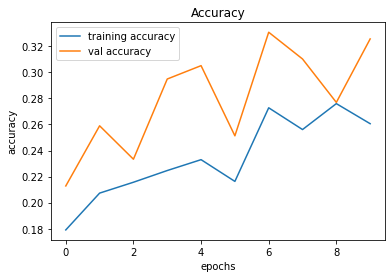

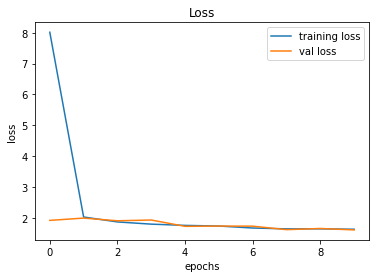

In [162]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [122]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

pred = model.predict_classes(X_test)

accuracy_score(labels, pred)
model.save('Face_Recognizer.h5')

D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


ValueError: in user code:

    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\Softwares\Anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_6 is incompatible with the layer: expected axis -1 of input shape to have value 4 but received input with shape (None, 30, 30, 3)


GUI Integration

In [163]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy

In [164]:
#load the trained model to classify sign
from keras.models import load_model
model = load_model('Face_Recognizer.h5')

In [165]:
classes = { 1:'Micheal B Jordan',
            2:'PewDiePie', 
            3:'Gordon Ramsay', 
            4:'Lebron James', 
            5:'Kanye West', 
            6:'MrBeast', 
            7:'Donald Trump', 
            8:'Harry Styles', 
            9:'Robert D Wilde', 
            10:'Salman Khan', 
            11:'Lionel Messi', 
            12:'Barak Obama', 
            13:'Greta Thunberg', 
            14:'Ananya Panday', 
            15:'Tanmay Bhat', 
            16:'Cristiano Ronaldo', 
            17:'Neymar Jr', 
            18:'Dua Lipa', 
            19:'Ussain Bolt', 
            20:'Justin Bieber', 
            21:'Marshal Mathers', 
            22:'Ngolo Kante', 
            23:'Jason Momoa', 
            24:'Sergio Aguero', 
            25:'Chris Pratt', 
            26:'Mohanlal', 
            27:'Vijay Joseph', 
            28:'Arundathi Roy', 
            29:'Chris Evans', 
            30:'Sundar Pichai', 
            31:'Narendra Modi',
            32:'The Weeknd', 
            33:'Jennifer Winget', 
            34:'Grant Gustin', 
            35:'Tom Holland', 
            36:'Selena Gomez', 
            37:'Roger Federer', 
            38:'Sonia Gandhi', 
            39:'David Doberik', 
            40:'John Cena', 
            41:'Ricardo Perera', 
            42:'Elon MUsk', 
            43:'Marques Brownly' }

In [166]:
#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Face')
top.configure(background='#CDCDCD')
label=Label(top,background='#CDCDCD', font=('Times',28,'bold'))
sign_image = Label(top)

In [167]:
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

In [ ]:
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Neural Network Facial Recognition",pady=20, font=('arial',20,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()